In [27]:
import doctest

# Array + 1

You need to add +1 to the given number which represtned as an array of ints.


Given an array of integers e.g. [1,3,2,4] which represents number 1324

Return array of integers [1,3,2,5] which represents number 1325 


This task assumes that integers inside the list are of value 0 to 9. 


In [29]:
def list_plus_one(n):
    """
    >>> list_plus_one([])
    []
    
    >>> list_plus_one([1])
    [2]

    >>> list_plus_one([1, 9])
    [2, 0]
    
    >>> list_plus_one([1, 3, 2, 4])
    [1, 3, 2, 5]

    >>> list_plus_one([9, 9, 9])
    [1, 0, 0, 0]
    
    """
    
    if not n:
        return list()
    
    carry = 1
    result = list()
    for number in reversed(n):
        current = number + carry
        if current == 10:
            result.insert(0, 0)
            carry = 1
        else:
            result.insert(0, current)
            carry = 0
    if carry == 1:
        result.insert(0, carry)
    return result

doctest.testmod()

TestResults(failed=0, attempted=5)

### Performance considerations

A list is implemented by an array of pointers to the objects it contains.

Every time you call 'insert(0, indx)', all of the pointers already in the list have to be moved up once position before the new one can be inserted at the beginning.

https://stackoverflow.com/questions/7776938/python-insert-vs-append


List in python are pre-provisioned (it resizes automatically as you add items). 




# Generate all subsets of the given set

In [48]:
input_array = [1, 2]

print([])
temp_array = list()
for index, number1 in enumerate(input_array):
    temp_array = [number1]
    print(temp_array)
    for number2 in input_array[1 + index:]:
        print([number1, number2])
        temp_array.append(number2)
        if len(temp_array) != 2:
            print(temp_array)


[]
[1]
[1, 2]
[2]


In [53]:
def all_subsets(given_array):
    subset = [None] * len(given_array)
    helper(given_array, subset, 0)
    
def helper(given_array, subset, i):
    if i == len(given_array):
        print(subset)
    else:
        
        subset[i] = None
        helper(given_array, subset, i+1)
        subset[i] = given_array[i]
        helper(given_array, subset, i+1)
        
all_subsets([1,2,3])


[None, None, None]
[None, None, 3]
[None, 2, None]
[None, 2, 3]
[1, None, None]
[1, None, 3]
[1, 2, None]
[1, 2, 3]


In [185]:
s = ''
n = 676

while n > 0:
    n, remainder = divmod(n - 1, 26)
    print(n, remainder)
    s += chr(remainder + 65)
        
    ''.join(reversed(s))

print(s)

25 25
0 24
ZY


In [259]:
n = 27

s = str()
while n:
    remainder = n % 26
    if remainder == 0:
        remainder = 26
    print(n, remainder)
    s = chr(ord('A') + remainder - 1) + s
    n = int((n - 1) / 26)
    print(n)
    
print(s)

27 1
1
1 1
0
AA


In [238]:
def xl_col_to_name(col_num, col_abs=False):
    """
    Convert a zero indexed column cell reference to a string.
    Args:
       col:     The cell column. Int.
       col_abs: Optional flag to make the column absolute. Bool.
    Returns:
        Column style string.
    """
    # col_num += 1  # Change to 1-index.
    col_str = ''
    col_abs = '$' if col_abs else ''

    while col_num:
        remainder = col_num % 26
        if remainder == 0:
            remainder = 26
        col_letter = chr(ord('A') + remainder - 1)

        # Accumulate the column letters, right to left.
        col_str = col_letter + col_str

        # Get the next order of magnitude.
        col_num = int((col_num - 1) / 26)

    return col_abs + col_str

xl_col_to_name(702)

'ZZ'

In [260]:
name = 'Dawa!'
print('Kto molodec?', name)

Kto molodec? Dawa!


In [262]:
my_list = [1,2,3]
list(map(str, my_list))

['1', '2', '3']

In [263]:
hash(5)

5

In [264]:
hash('ATCG')

-2295628006095211424

In [266]:
hash('ATCASDASDsdffdsafsdaafsdfdfadsASDG')

3225153923144874647

In [2]:
%%pytest

def test_my_stuff():
    assert 42 == 42

ERROR:root:Cell magic `%%pytest` not found.


cubics. O(1) space O(1) time

generate all 01010 of a given length. 

find duplicates in the array of integers.  O(n) time and O(n) space

given consequtive integers 1 to n, I remove 1 of them. find this item.  O(n) time and O(1) space

excel numbers to letters and the other direction. O(n) time and O(1) space

roman numerals to regular ints and the other direction. O(n) time and o(1) space


In [198]:
class UnionFind:
    def __init__(self, length):
        self.length = length
        self.array = self._initialize()
        
    def _initialize(self) -> list:
        return [i for i in range(self.length)]
    
    def union(self, source, destination) -> None:
        """add a connection between source and destination"""
        source_id = self.array[source]
        destination_id = self.array[destination]
        for index, node in enumerate(self.array):
            if node == source_id:
                self.array[index] = destination_id
    
    def is_connected(self, source, destination) -> bool:
        """checks if there is a path between source and a destination"""
        return self.array[source] == self.array[destination]
    
    def count(self) -> int:
        """number of components"""
        return len(set(self.array))
    

In [199]:
import unittest

class TestUnionFind(unittest.TestCase):

    
    def test_connect(self):
        uf = UnionFind(3)
        uf.union(1,2)
        self.assertTrue(uf.is_connected(1,2))
        self.assertFalse(uf.is_connected(0,1))
    
    def test_components(self):
        uf = UnionFind(3)
        uf.union(0,1)
        self.assertEqual(uf.count(), 2)
        

    def test_union(self):
        uf = UnionFind(5)
        uf.union(0,1)
        uf.union(1,2)
        uf.union(2,3)
        uf.union(3,4)
        self.assertEqual(uf.array, [4,4,4,4,4])

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    
    

...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


In [216]:
class QuickUnion:
    def __init__(self, length):
        self.length = length
        self.array = self._initialize()
        
    def _initialize(self) -> list:
        return [i for i in range(self.length)]
    
    def union(self, source, destination) -> None:
        """add a connection between source and destination"""
        self.array[self.root(source)] = self.root(destination)
    
    def is_connected(self, source, destination) -> bool:
        """checks if there is a path between source and a destination"""
        return self.root(source) == self.root(destination)
        
    def root(self, node) -> int:
        while node != self.array[node]:
            node = self.array[node]
        return node
    
    def count(self) -> int:
        """number of components"""
        return len(set([self.root(i) for i in self.array]))
    

In [218]:
import unittest

class TestQuickUnion(unittest.TestCase):

    
    def test_connect(self):
        uf = QuickUnion(3)
        uf.union(1,2)
        self.assertTrue(uf.is_connected(1,2))
        self.assertFalse(uf.is_connected(0,1))
    
    def test_components(self):
        uf = QuickUnion(3)
        uf.union(0,1)
        self.assertEqual(uf.count(), 2)
        

    def test_union(self):
        uf = QuickUnion(5)
        uf.union(0,1)
        uf.union(1,2)
        uf.union(2,3)
        uf.union(3,4)
        self.assertEqual(uf.array, [1,2,3,4,4])

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    
    

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


implement dijkstra 2 stack algorithm for arithmetic oeprations

In [226]:
date = '28/Feb/2018:12:37:15'
from datetime import datetime

In [228]:
date = datetime.strptime(date, "%d/%b/%Y:%H:%M:%S")

In [229]:
date

datetime.datetime(2018, 2, 28, 12, 37, 15)

In [246]:

a = re.search('-P\d+', '18.0.0.3713-P132')

In [247]:
a.group(0)

'-P132'

In [248]:
s = 'dsfjlaskf-sadfadsf'

In [249]:
s = s.split('-')

In [250]:
s

['dsfjlaskf', 'sadfadsf']

In [251]:
s = 'sdafadsffsadf'
s = s.split('-')
s

['sdafadsffsadf']

In [252]:
s

['sdafadsffsadf']

In [253]:
str(s)

"['sdafadsffsadf']"

In [254]:
s[0]

'sdafadsffsadf'

In [255]:
6^2

4

In [287]:
cur_x = -6 # The algorithm starts at x=6
gamma = 0.01 # step size multiplier
precision = 0.0000001
previous_step_size = cur_x

df = lambda x: 2*x -4 #4 * x**3 - 9 * x**2

while previous_step_size > precision:
    prev_x = cur_x
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)

print("The local minimum occurs at %f" % cur_x)





The local minimum occurs at -6.000000


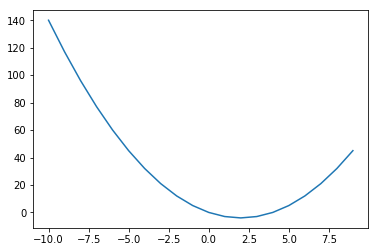

In [283]:
import matplotlib.pyplot as p
x = range(-10, 10)
y = lambda x : x**2 - 4*x


p.plot(x, [y(i) for i in x])
p.show()

In [ ]:
f = lambda x : sqrt
p.plot()

In [ ]:
def assign_points_to_cluster(points: list, cluster: list) -> dict:
    return ...